In [336]:
import json
import psycopg2
import time
import pandas as pd
from datetime import datetime
import numpy as np
import math
import pickle
import os
import pandas.io.sql as sqlio
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
conn = psycopg2.connect(
  port='5432',
  host= "shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com",
  user= "softtouchlenses_4e0b7c925f8444429457581f35678aea",
  password="softtouchlenses_4e0b7c925f8444429457581f35678aea_password",
  database= "softtouchlenses_4e0b7c925f8444429457581f35678aea_db")
'''
conn = psycopg2.connect(
  host='shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com',
  port='5432',
  user='paakhi_b014108f50994e35ab8fa4e2dc26d612',
  password='paakhi_b014108f50994e35ab8fa4e2dc26d612_password',
  database='paakhi_b014108f50994e35ab8fa4e2dc26d612_db')'''

"\nconn = psycopg2.connect(\n  host='shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com',\n  port='5432',\n  user='paakhi_b014108f50994e35ab8fa4e2dc26d612',\n  password='paakhi_b014108f50994e35ab8fa4e2dc26d612_password',\n  database='paakhi_b014108f50994e35ab8fa4e2dc26d612_db')"

In [338]:
q='''SELECT created_at as created, id as order_iD, total_price as order_amount, email as user_id from orders WHERE
cancelled_at is NULL;
'''
e=pd.read_sql(q,conn)

<ipython-input-338-f8442b19a9e2>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  e=pd.read_sql(q,conn)


In [339]:
e

,created,order_id,order_amount,user_id
0,2023-10-16 13:21:08,5131895963822,2998.0,ramaramkumaar@gmail.com
1,2023-09-20 20:11:18,5103650734254,2800.0,prabhatsethia61@yahoo.in
2,2023-11-25 10:09:45,5197214744750,1300.0,ayesha.chopra1@gmail.com
3,2023-11-24 23:19:53,5195141972142,1399.0,yash20j@hotmail.com
4,2023-11-24 22:34:14,5194968072366,879.0,ankitmehrotra343@gmail.com
...,...,...,...,...
2289,2023-12-01 17:16:51,5209560383662,1780.0,poojianand@yahoo.com
2290,2023-12-01 12:00:44,5209277989038,740.0,manjupatilhosur@gmail.com
2291,2023-12-01 11:51:39,5209273335982,740.0,manjupatilhosur@gmail.com
2292,2023-11-30 19:31:09,5208115544238,2190.0,i080622@gmail.com


In [340]:
#e=e[e['created']<='2023/05/29']
#e=e[e['created']>='2023/11/29']
#e.info()
e['user_id'].nunique()

1783

In [341]:
e['WeekCount']=e['created'].dt.strftime('%Y-w%U')

In [342]:
len(e)

2294

In [343]:
e=e.sort_values('created')
WeekList=e['WeekCount'].unique()

In [344]:
e['WeekCount'].value_counts().tail(50)

2022-w51    14
2022-w32    14
2022-w06    14
2023-w04    14
2023-w09    13
2022-w37    13
2023-w01    13
2022-w50    13
2023-w03    12
2022-w49    12
2022-w26    12
2022-w33    12
2022-w28    12
2022-w44    12
2022-w24    11
2022-w43    11
2023-w02    11
2022-w29    11
2022-w47    11
2022-w25    10
2021-w41    10
2022-w04    10
2022-w40     9
2021-w40     9
2022-w02     9
2022-w03     9
2022-w09     9
2022-w38     9
2021-w34     8
2022-w30     8
2022-w36     8
2021-w51     8
2022-w35     8
2021-w43     8
2022-w39     7
2022-w42     7
2022-w01     7
2021-w48     6
2021-w50     6
2022-w34     6
2021-w37     6
2021-w35     6
2021-w47     5
2021-w46     5
2021-w49     5
2021-w42     5
2021-w36     5
2021-w44     4
2021-w33     4
2021-w52     1
Name: WeekCount, dtype: int64

In [345]:
List=WeekList
List

array(['2021-w33', '2021-w34', '2021-w35', '2021-w36', '2021-w37',
       '2021-w38', '2021-w39', '2021-w40', '2021-w41', '2021-w42',
       '2021-w43', '2021-w44', '2021-w45', '2021-w46', '2021-w47',
       '2021-w48', '2021-w49', '2021-w50', '2021-w51', '2021-w52',
       '2022-w01', '2022-w02', '2022-w03', '2022-w04', '2022-w05',
       '2022-w06', '2022-w07', '2022-w08', '2022-w09', '2022-w10',
       '2022-w11', '2022-w12', '2022-w13', '2022-w14', '2022-w15',
       '2022-w16', '2022-w17', '2022-w18', '2022-w19', '2022-w20',
       '2022-w21', '2022-w22', '2022-w23', '2022-w24', '2022-w25',
       '2022-w26', '2022-w27', '2022-w28', '2022-w29', '2022-w30',
       '2022-w31', '2022-w32', '2022-w33', '2022-w34', '2022-w35',
       '2022-w36', '2022-w37', '2022-w38', '2022-w39', '2022-w40',
       '2022-w41', '2022-w42', '2022-w43', '2022-w44', '2022-w45',
       '2022-w46', '2022-w47', '2022-w48', '2022-w49', '2022-w50',
       '2022-w51', '2022-w52', '2023-w01', '2023-w02', '2023-w

In [346]:
e["New"] = 0
e['TrxnRank'] = e.groupby('user_id')['created'].rank(method='first')
e.loc[e['TrxnRank']==1,'New'] = 1

In [347]:
e['OrderDate']=e['created'].dt.date
e['OrderDate']=pd.to_datetime(e['OrderDate'])
e['DeltaDaysinOrders']=(e.groupby('user_id').OrderDate.shift() - e.OrderDate).dt.days.abs()
e['DeltaOrderValues']=(e.groupby('user_id').order_amount.shift() - e.order_amount)

In [348]:
k=e
k['OrderDate']=k['created'].dt.date
k['OrderDate']=pd.to_datetime(k['OrderDate'])
WeekList=k['WeekCount'].unique()

In [349]:
e['New'].value_counts()

1    1783
0     511
Name: New, dtype: int64

In [350]:
e[e['New'] == 0]

,created,order_id,order_amount,user_id,WeekCount,New,TrxnRank,OrderDate,DeltaDaysinOrders,DeltaOrderValues
2242,2021-08-29 21:15:08,3988675231918,1885.0,asadkhatri@hotmail.com,2021-w35,0,2.0,2021-08-29,6.0,0.0
2232,2021-09-08 13:46:34,4010248208558,1100.0,atulkale2016@gmail.com,2021-w36,0,2.0,2021-09-08,0.0,0.0
2206,2021-09-28 16:03:51,4046889451694,899.0,daisyraniadvocate@gmail.com,2021-w39,0,2.0,2021-09-28,0.0,0.0
2200,2021-09-29 12:16:14,4048382034094,2100.0,gaganjaswal@hotmail.co.uk,2021-w39,0,2.0,2021-09-29,15.0,0.0
2191,2021-10-05 12:12:03,4059511455918,2100.0,katyal.sukriti@gmail.com,2021-w40,0,2.0,2021-10-05,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2267,2023-12-05 23:05:45,5216638501038,1000.0,vinodpapondiya222@gmail.com,2023-w49,0,5.0,2023-12-05,85.0,0.0
2263,2023-12-06 17:13:43,5217797406894,2848.0,sapatepriya1995@gmail.com,2023-w49,0,3.0,2023-12-06,121.0,0.0
2259,2023-12-07 11:24:06,5219370860718,5648.0,ankitgoel888@gmail.com,2023-w49,0,3.0,2023-12-07,409.0,-3018.0
2233,2023-12-07 11:24:58,5219371548846,1780.0,lal.anisha10@gmail.com,2023-w49,0,4.0,2023-12-07,394.0,-990.0


In [351]:
e['WeekCount'].value_counts().tail(50)

e['OrderDate']=e['created'].dt.date
e['OrderDate']=pd.to_datetime(k['OrderDate'])

x1=e.groupby('user_id').agg(
          LastDate=pd.NamedAgg(column='OrderDate', aggfunc= 'max'),
          FirstDate=pd.NamedAgg(column='OrderDate', aggfunc='min'),
          Frequency=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          AOV=pd.NamedAgg(column='order_amount', aggfunc='mean'),
          OrderValue=pd.NamedAgg(column='order_amount', aggfunc='sum'),
          MeanDaysDelta=pd.NamedAgg(column='DeltaDaysinOrders', aggfunc='mean'),
          MeanOVDelta=pd.NamedAgg(column='DeltaOrderValues', aggfunc='mean'),
          New=pd.NamedAgg(column='New',aggfunc='mean')
      ).reset_index()
globalmaxdate=e['OrderDate'].max()
x1['Recency']=globalmaxdate-x1['LastDate']
x1['Recency']=x1['Recency'].dt.days.abs()
x1['ActivatedQuater']=x1['FirstDate'].dt.to_period('Q')
x1['MaturityAge']=x1['LastDate']-x1['FirstDate']
x1['MaturityAge']=x1['MaturityAge'].dt.days.abs()
x1['MeanDaysDelta']=x1['MeanDaysDelta'].fillna(0)
x1['MeanOVDelta']=x1['MeanOVDelta'].fillna(0)

r_labels, f_labels,AOV_labels, m_labels,DelAOV_labels = range(4, 0, -1), range(1,5), range(1,5),range(1,5),range(1,5)
x1['r_score'] = x1['Recency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = r_labels)).astype('int64')
x1['f2d_score'] = x1['Frequency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = f_labels)).astype('int64')
x1['AOV_score'] = x1['AOV'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = AOV_labels)).astype('int64')
x1['m_score'] = x1['MaturityAge'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = m_labels)).astype('int64')
x1['DelAOV'] = x1['MeanOVDelta'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = DelAOV_labels)).astype('int64')
x1['SumScore'] = x1['r_score'] + x1['f2d_score'] + x1['m_score'] + x1['AOV_score']+ x1['DelAOV']

def CohortLables_1(df):
  if (df['New']==1 and df['AOV_score']>2):
    return 'New&High Value'
  elif (df['New']==1 and df['AOV_score']<=2):
    return 'New&Low Value'
  elif (df['New']<1 and df['AOV_score']<=2):
    return 'Returning&Low Value'
  else:
    return 'Returning&High Value'

def CohortLables_2(df):
  if ((df['SumScore'] >= 18) and (df['Frequency']>1)):
      return 'Champions'
  elif ((df['m_score'] <=1) and (df['SumScore'] >= 10)and (df['SumScore'] < 18) and (df['r_score'] >1)):
      return 'New&Potential'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 14)and (df['SumScore'] < 18)and (df['r_score'] >1)):
      return 'Mature&Loyal'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 10)and (df['SumScore'] < 14)and (df['r_score'] >1)):
      return 'Mature&Slow'
  elif ((df['m_score'] <=1) and (df['SumScore'] >= 5)and (df['SumScore'] < 10)and (df['r_score'] >1)):
      return 'New&Slow'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 5)and (df['SumScore'] < 10)and (df['r_score'] >1)):
      return 'Mature&ChurnRisk'
  else:
      return 'Churned'

In [352]:
x1['Frequency'].describe()

count    1783.000000
mean        1.286596
std         0.937601
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        19.000000
Name: Frequency, dtype: float64

In [353]:
count_customer = e['user_id'].nunique()
maxDate = e.OrderDate.max()
minDate = e.OrderDate.min()
no_of_days = maxDate - minDate
no_of_days.days

if (count_customer<500 or no_of_days.days < 180):
  x1['CohortLabel'] = x1.apply(CohortLables_1, axis=1)
else:
  x1['CohortLabel'] = x1.apply(CohortLables_2, axis=1)

In [354]:
segstats=x1.groupby(
  'CohortLabel'
).agg(
      Users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
      Recency=pd.NamedAgg(column='Recency', aggfunc='mean'),
      Frequency=pd.NamedAgg(column='Frequency', aggfunc='mean'),
      AOV=pd.NamedAgg(column='AOV', aggfunc='mean'),
      OrderValue=pd.NamedAgg(column='OrderValue', aggfunc='sum'),
      #MeanDaysDelta=pd.NamedAgg(column='MeanDaysDelta', aggfunc='mean'),
      #MeanOVDelta=pd.NamedAgg(column='MeanOVDelta', aggfunc='mean'),
      #FrequencyperDeltaDays=pd.NamedAgg(column='FrequencyperDeltaDays', aggfunc='mean'),
    Maturity=pd.NamedAgg(column='MaturityAge', aggfunc='mean'),
    OrderCount=pd.NamedAgg(column='Frequency', aggfunc='sum'),
).reset_index()
segstats['OrderValueMix']=segstats['OrderValue']/segstats['OrderValue'].sum()
segstats['UsersMix']=segstats['Users']/segstats['Users'].sum()
segstats['AOV_Contribution']=segstats['OrderValue']/segstats['OrderCount'].sum()
segstats['OrderCountMix']=segstats['OrderCount']/segstats['OrderCount'].sum()

In [355]:
segstats

,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,Champions,49,107.714286,2.714286,2773.937075,375045.0,173.448980,133,0.091688,0.027482,163.489538,0.057977
1,Churned,515,569.974757,1.067961,1593.466990,896165.0,3.330097,550,0.219088,0.288839,390.656059,0.239756
2,Mature&ChurnRisk,21,319.809524,1.000000,765.904762,16084.0,0.000000,21,0.003932,0.011778,7.011334,0.009154
3,Mature&Loyal,562,165.959075,1.656584,1824.193170,1852251.1,81.654804,931,0.452826,0.315199,807.432912,0.405841
4,Mature&Slow,311,217.826367,1.064309,1337.687835,436169.0,7.035370,331,0.106632,0.174425,190.134699,0.144289
5,New&Potential,85,119.105882,1.023529,2556.335294,220825.0,0.000000,87,0.053986,0.047672,96.261988,0.037925
6,New&Slow,240,214.616667,1.004167,1220.366667,293887.0,0.000000,241,0.071848,0.134605,128.111160,0.105057


In [356]:
sum_row = segstats.sum(numeric_only=True)
segstats = segstats.append(sum_row, ignore_index=True)
segstats.at[segstats.index[-1], 'CohortLabel'] = 'Overall'
segstats

<ipython-input-356-78a7b8529fbe>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segstats = segstats.append(sum_row, ignore_index=True)


,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,Champions,49.0,107.714286,2.714286,2773.937075,375045.0,173.448980,133.0,0.091688,0.027482,163.489538,0.057977
1,Churned,515.0,569.974757,1.067961,1593.466990,896165.0,3.330097,550.0,0.219088,0.288839,390.656059,0.239756
2,Mature&ChurnRisk,21.0,319.809524,1.000000,765.904762,16084.0,0.000000,21.0,0.003932,0.011778,7.011334,0.009154
3,Mature&Loyal,562.0,165.959075,1.656584,1824.193170,1852251.1,81.654804,931.0,0.452826,0.315199,807.432912,0.405841
4,Mature&Slow,311.0,217.826367,1.064309,1337.687835,436169.0,7.035370,331.0,0.106632,0.174425,190.134699,0.144289
5,New&Potential,85.0,119.105882,1.023529,2556.335294,220825.0,0.000000,87.0,0.053986,0.047672,96.261988,0.037925
6,New&Slow,240.0,214.616667,1.004167,1220.366667,293887.0,0.000000,241.0,0.071848,0.134605,128.111160,0.105057
7,Overall,1783.0,1715.006557,9.530835,12071.891793,4090426.1,265.469251,2294.0,1.000000,1.000000,1783.097690,1.000000


In [357]:
def weighted_average_column(df, column_name, weights_column):
    data = df[column_name]
    weights = df[weights_column]

    if weights.sum() == 0:
        raise ValueError("Total weight must be greater than 0.")

    return (data * weights).sum() / weights.sum()

h = weighted_average_column(segstats, 'Maturity', 'Users')
g = weighted_average_column(segstats, 'Frequency', 'Users')

In [358]:
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Recency'] = segstats['Recency'].min()
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Frequency'] = g
segstats.loc[segstats['CohortLabel'] == 'Overall', 'AOV'] = segstats['AOV'].mean()
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Maturity'] = h
segstats

,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,Champions,49.0,107.714286,2.714286,2773.937075,375045.0,173.448980,133.0,0.091688,0.027482,163.489538,0.057977
1,Churned,515.0,569.974757,1.067961,1593.466990,896165.0,3.330097,550.0,0.219088,0.288839,390.656059,0.239756
2,Mature&ChurnRisk,21.0,319.809524,1.000000,765.904762,16084.0,0.000000,21.0,0.003932,0.011778,7.011334,0.009154
3,Mature&Loyal,562.0,165.959075,1.656584,1824.193170,1852251.1,81.654804,931.0,0.452826,0.315199,807.432912,0.405841
4,Mature&Slow,311.0,217.826367,1.064309,1337.687835,436169.0,7.035370,331.0,0.106632,0.174425,190.134699,0.144289
5,New&Potential,85.0,119.105882,1.023529,2556.335294,220825.0,0.000000,87.0,0.053986,0.047672,96.261988,0.037925
6,New&Slow,240.0,214.616667,1.004167,1220.366667,293887.0,0.000000,241.0,0.071848,0.134605,128.111160,0.105057
7,Overall,1783.0,107.714286,5.408715,3017.972948,4090426.1,149.081232,2294.0,1.000000,1.000000,1783.097690,1.000000


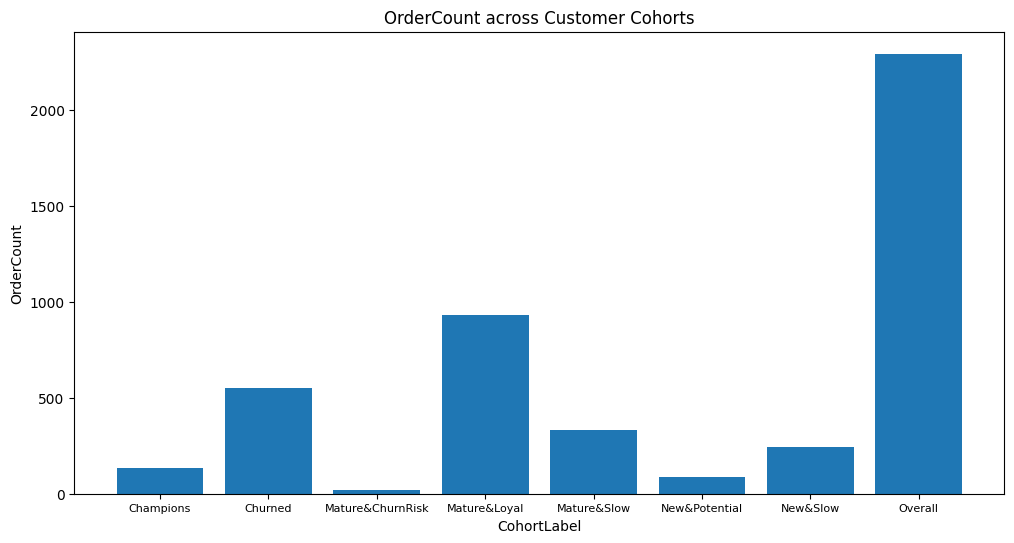

In [359]:
column_to_plot = 'OrderCount'
x_labels = segstats['CohortLabel']
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(x_labels, segstats[column_to_plot])
plt.xlabel('CohortLabel')
plt.ylabel(column_to_plot)
plt.title(f'{column_to_plot} across Customer Cohorts')
plt.xticks(fontsize=8)
plt.show()